### <span style="color:blue"> Supervised Machine Learning: Regression and Classification</span>

#### Coursera

#### By deeplearning.ai & Stanford University

## <span style="color:blue"> Week 1: Introduction to Machine Learning </span>

### Supervised Learning

Learn from being given "Right Answers"

* Examples:

| Input(x) | Output(y) | Application  | 
|---|---|---|
| Email | Spam(0/1) | Spam Filtering |
| Audio | Text transcripts | Speech Recognition |
| English | Spanish | Machine Translation |
| Ad, user info | Click(0/1) | online advertising |
| image, radar info | Position of cars | Self-driving car |
| Image of phone | Defect(0/1) | Visual Inspection |

1. Regression:
    - Predict a Number
    - Infinitely many possible outputs
2. Classification: think about the classic "Iris" dataset example or the cancer example,
    - Predict categories
    - Small number of possible outputs

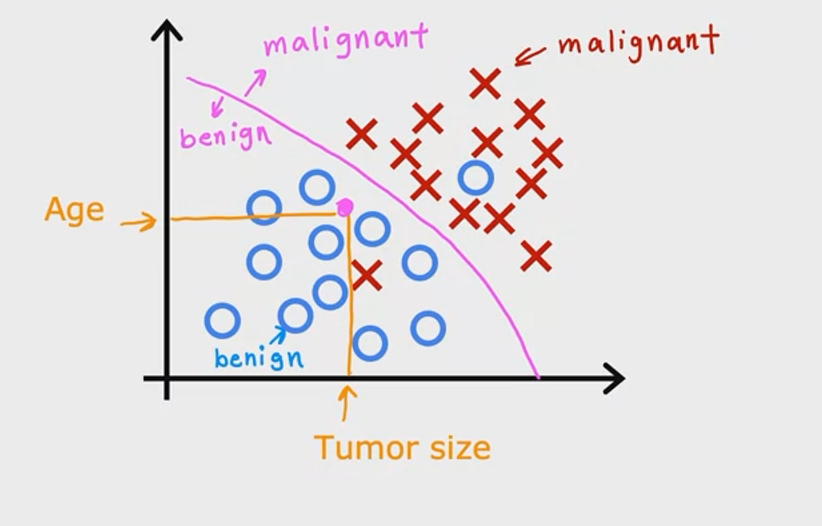

### Unsupervised Learning

Find something interesting in **unlabeled** data, the algorithm has to find **structure** in the data.

1. Clustering
    - Group similar data points together

    
2. Anomaly Detection
    - Find unusual data points.


3. Dimensionality Reduction
    - Compress data using fewer numbers.


### <span style="color:blue"> Regression Problem Statement</span>


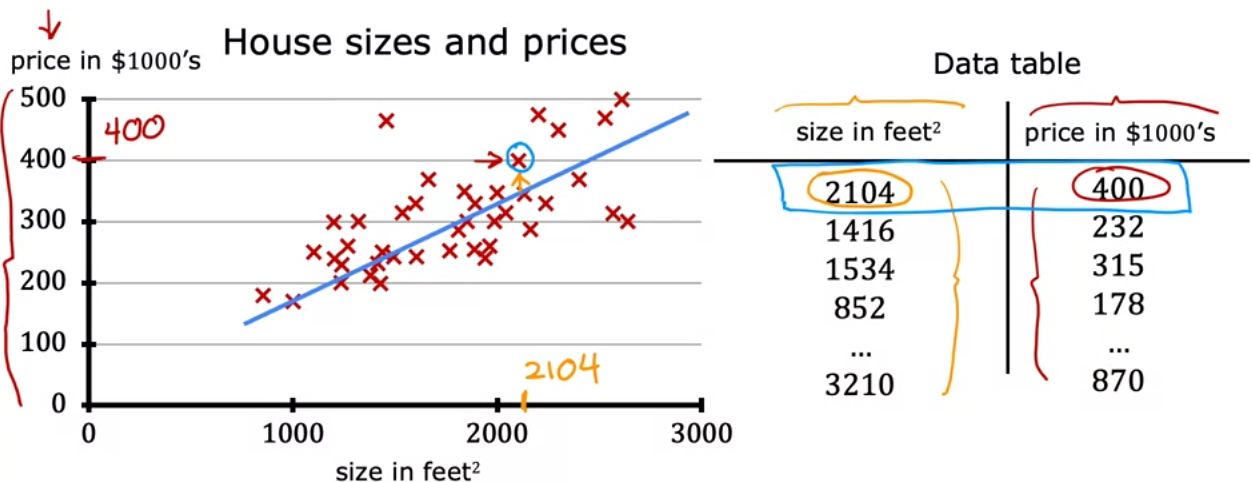

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# We have two data points, so we have to create our "training variables" manually,
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [2]:
# Function to print the amount of variables.
print(f"Number of training examples is: {x_train.shape[0]}")
print(f"Number of training examples is: {len(x_train)}")

Number of training examples is: 2
Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example.

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.

In [10]:
i = 0 # Print all values
for i in range(len(x_train)):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)
(x^(1), y^(1)) = (2.0, 500.0)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- `marker` and `c` are used just for cosmetic.

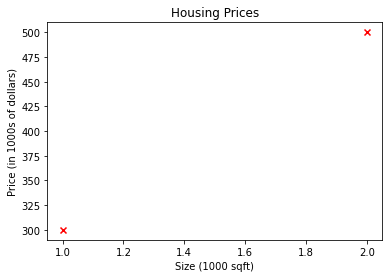

In [4]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices") # Set Title
plt.ylabel('Price (in 1000s of dollars)') # y-axis label
plt.xlabel('Size (1000 sqft)') # x-axis label
plt.show()

## Model function

As described in lecture, the model function for **linear regression** is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

* Remember that $ f_{w,b}(x^{(i)}) $ = y$^{(i)}$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/>

Just for testing reason, we will start with the values: $w = 100$ and $b = 100$. 

In [11]:
w = 100
b = 100

In [6]:
# This function only create the model based on the three variables: X_train, w and b.

def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

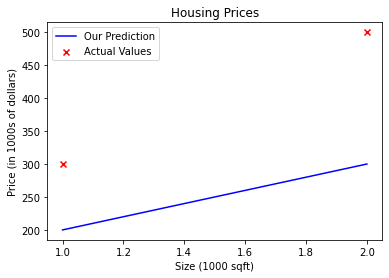

In [12]:
tmp_f_wb = compute_model_output(x_train, w, b,)

plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Challenge
Find the best $w$ and $b$

In [26]:
ch_w = (y_train[1] - y_train[0])/(x_train[1] - x_train[0])
ch_b = y_train[1]-(ch_w*x_train[1])

tmp_f_wb = compute_model_output(x_train, ch_w, ch_b)

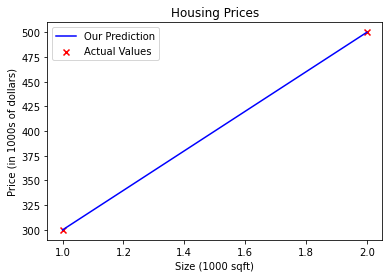

In [27]:
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [28]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


### <span style="color:blue"> Cost Function Problem Statement</span>